# Let's experimento

## Download the datasets

In [5]:
!git clone https://github.com/fosfrancesco/asap-dataset data/asap

Cloning into 'data/asap'...
remote: Enumerating objects: 3427, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 3427 (delta 245), reused 240 (delta 230), pack-reused 3148
Receiving objects: 100% (3427/3427), 77.91 MiB | 2.61 MiB/s, done.
Resolving deltas: 100% (426/426), done.
Updating files: 100% (2854/2854), done.


In [4]:
!wget https://storage.googleapis.com/magentadata/datasets/e-gmd/v1.0.0/e-gmd-v1.0.0-midi.zip -O data/eg-midi.zip
!unzip data/eg-midi.zip -d data/eg-midi
!rm -rf data/eg-midi.zip

--2023-10-14 21:24:32--  https://storage.googleapis.com/magentadata/datasets/e-gmd/v1.0.0/e-gmd-v1.0.0-midi.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.169.123, 216.58.212.59, 142.251.140.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.169.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107076192 (102M) [application/zip]
Saving to: ‘data/eg-midi.zip’

data/eg-midi.zip    100%[===================>] 102.12M  3.21MB/s    in 35s     

2023-10-14 21:25:08 (2.88 MB/s) - ‘data/eg-midi.zip’ saved [107076192/107076192]

Archive:  data/eg-midi.zip
   creating: data/eg-midi/e-gmd-v1.0.0/
  inflating: data/eg-midi/e-gmd-v1.0.0/LICENSE  
   creating: data/eg-midi/e-gmd-v1.0.0/drummer1/
   creating: data/eg-midi/e-gmd-v1.0.0/drummer1/eval_session/
  inflating: data/eg-midi/e-gmd-v1.0.0/drummer1/eval_session/3_soul-groove3_86_beat_4-4_18.midi  
  inflating: data/eg-midi/e-gmd-v1.0.0/drummer1/eval_session/6_hiphop

## Le imports

In [8]:
!pip3 install music21 partitura

  Obtaining dependency information for partitura from https://files.pythonhosted.org/packages/4a/b2/e54739c13f407b8e5788cc6361a42de974ff9284ad54e12c24f15d8fa925/partitura-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/d6/56/9d5cb3438143a5aebad59088ca392950d74a531e1b96d0959144370b3b59/lxml-4.9.3-cp311-cp311-macosx_11_0_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.9 MB/s eta 0:00:00
  Obtaining dependency information for xmlschema from https://files.pythonhosted.org/packages/a4/2b/0205e1d55601d13bbbbce538301e5e00afe22ec1dc2fc61ca8074f8439c2/xmlschema-2.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for mido from https://files.pythonhosted.org/packages/b0/0e/b551e09391220208764c00ed2b382e198414329d8b6037eeb54a8008d737/mido-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for elementpath<5.0.0,>=4.1.5 from https://files.pythonhosted.org/pack

In [30]:
import os
import pandas as pd
import partitura
from music21 import midi # for midi playback in the notebook
import matplotlib.pyplot as plt
import numpy as np


## Helpful funcs

In [3]:
def play_midi(filepath):
    mf = midi.MidiFile()
    mf.open(filepath)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

## What's inside?

### ASAP dataset

In [4]:

ASAP_BASE_PATH = os.path.join('data', 'asap')
ASAP_METADATA_PATH = os.path.join(ASAP_BASE_PATH, 'metadata.csv')
asap_metadata_df = pd.read_csv(ASAP_METADATA_PATH)

In [5]:
asap_metadata_df.sample(10)

composer                                    title  \
538     Chopin                          Etudes_op_10_12   
604     Chopin                           Etudes_op_10_8   
69        Bach                            Fugue_bwv_885   
395  Beethoven                       Piano_Sonatas_31-2   
80        Bach                            Fugue_bwv_892   
383  Beethoven                       Piano_Sonatas_31-1   
833      Liszt  Gran_Etudes_de_Paganini_2_La_campanella   
687     Chopin                              Scherzos_31   
192  Beethoven                       Piano_Sonatas_12-1   
360  Beethoven                       Piano_Sonatas_30-1   

                                            folder  \
538                         Chopin/Etudes_op_10/12   
604                          Chopin/Etudes_op_10/8   
69                              Bach/Fugue/bwv_885   
395                   Beethoven/Piano_Sonatas/31-2   
80                              Bach/Fugue/bwv_892   
383                   Beethoven/Piano_Sonatas/31-1   
833  Liszt/Gran_Etudes_de_Paganini/2_La_campanella   
687                             Chopin/Scherzos/31   
192                   Beethoven/Piano_Sonatas/12-1   
360                   Beethoven/Piano_Sonatas/30-1   

                                             xml_score  \
538          Chopin/Etudes_op_10/12/xml_score.musicxml   
604           Chopin/Etudes_op_10/8/xml_score.musicxml   
69               Bach/Fugue/bwv_885/xml_score.musicxml   
395    Beethoven/Piano_Sonatas/31-2/xml_score.musicxml   
80               Bach/Fugue/bwv_892/xml_score.musicxml   
383    Beethoven/Piano_Sonatas/31-1/xml_score.musicxml   
833  Liszt/Gran_Etudes_de_Paganini/2_La_campanella/...   
687              Chopin/Scherzos/31/xml_score.musicxml   
192    Beethoven/Piano_Sonatas/12-1/xml_score.musicxml   
360    Beethoven/Piano_Sonatas/30-1/xml_score.musicxml   

                                            midi_score  \
538              Chopin/Etudes_op_10/12/midi_score.mid   
604               Chopin/Etudes_op_10/8/midi_score.mid   
69                   Bach/Fugue/bwv_885/midi_score.mid   
395        Beethoven/Piano_Sonatas/31-2/midi_score.mid   
80                   Bach/Fugue/bwv_892/midi_score.mid   
383        Beethoven/Piano_Sonatas/31-1/midi_score.mid   
833  Liszt/Gran_Etudes_de_Paganini/2_La_campanella/...   
687                  Chopin/Scherzos/31/midi_score.mid   
192        Beethoven/Piano_Sonatas/12-1/midi_score.mid   
360        Beethoven/Piano_Sonatas/30-1/midi_score.mid   

                                      midi_performance  \
538                 Chopin/Etudes_op_10/12/LuoJ08M.mid   
604               Chopin/Etudes_op_10/8/LeeJisun02.mid   
69                     Bach/Fugue/bwv_885/SINKEV06.mid   
395           Beethoven/Piano_Sonatas/31-2/Zuber04.mid   
80                   Bach/Fugue/bwv_892/KabuliL01M.mid   
383           Beethoven/Piano_Sonatas/31-1/SOLOM04.mid   
833  Liszt/Gran_Etudes_de_Paganini/2_La_campanella/...   
687                    Chopin/Scherzos/31/Dossin06.mid   
192            Beethoven/Piano_Sonatas/12-1/Zhao02.mid   
360            Beethoven/Piano_Sonatas/30-1/CHEN02.mid   

                               performance_annotations  \
538     Chopin/Etudes_op_10/12/LuoJ08M_annotations.txt   
604   Chopin/Etudes_op_10/8/LeeJisun02_annotations.txt   
69         Bach/Fugue/bwv_885/SINKEV06_annotations.txt   
395  Beethoven/Piano_Sonatas/31-2/Zuber04_annotatio...   
80       Bach/Fugue/bwv_892/KabuliL01M_annotations.txt   
383  Beethoven/Piano_Sonatas/31-1/SOLOM04_annotatio...   
833  Liszt/Gran_Etudes_de_Paganini/2_La_campanella/...   
687        Chopin/Scherzos/31/Dossin06_annotations.txt   
192  Beethoven/Piano_Sonatas/12-1/Zhao02_annotation...   
360  Beethoven/Piano_Sonatas/30-1/CHEN02_annotation...   

                                midi_score_annotations  \
538  Chopin/Etudes_op_10/12/midi_score_annotations.txt   
604   Chopin/Etudes_op_10/8/midi_score_annotations.txt   
69       Bach/Fugue/bwv_885/mid

In [8]:
example_file = os.path.join(ASAP_BASE_PATH, asap_metadata_df.iloc[360]['midi_performance']) # Beethoven 30-1 CHEN2.mid
play_midi(example_file)

In [9]:
# check the dynamics of an example file

example_perf = partitura.load_performance_midi(example_file)
example_perf.performedparts

In [17]:
# we can see there is only one track, so we can access it directly
notes = example_perf.performedparts[0].note_array()
notes

array([(  2.0491433, 0.84401625,   1918,  249, 68, 36, 0, 0, 'n0'),
       (  2.2510662, 0.64209336,   2107,   81, 71, 44, 0, 0, 'n1'),
       (  2.4262795, 0.46687987,   2271,  187, 52, 35, 0, 0, 'n2'), ...,
       (236.07669  , 7.2841806 , 220968, 5538, 44, 24, 0, 0, 'n1515'),
       (236.08096  , 7.279907  , 220972, 6022, 40, 26, 0, 0, 'n1516'),
       (236.08951  , 7.2713604 , 220980, 5025, 52, 26, 0, 0, 'n1517')],
      dtype=[('onset_sec', '<f4'), ('duration_sec', '<f4'), ('onset_tick', '<i4'), ('duration_tick', '<i4'), ('pitch', '<i4'), ('velocity', '<i4'), ('track', '<i4'), ('channel', '<i4'), ('id', '<U256')])

So for each note we have:

* [0] = Triggered (second) (`float`)
* [1] = Duration (seconds) (`float`)
* [2] = Triggered (tick) (`int`)
* [3] = Duration (ticks) (`int`)
* [4] = Pitch (MIDI note number) (0-127) (`int`)
* [5] = Velocity (MIDI value) (0-127) (`int`)
* [6] = Track (`int`)
* [7] = MIDI Channel 0-15 (`int`)
* [8] = Note ID (`str`)

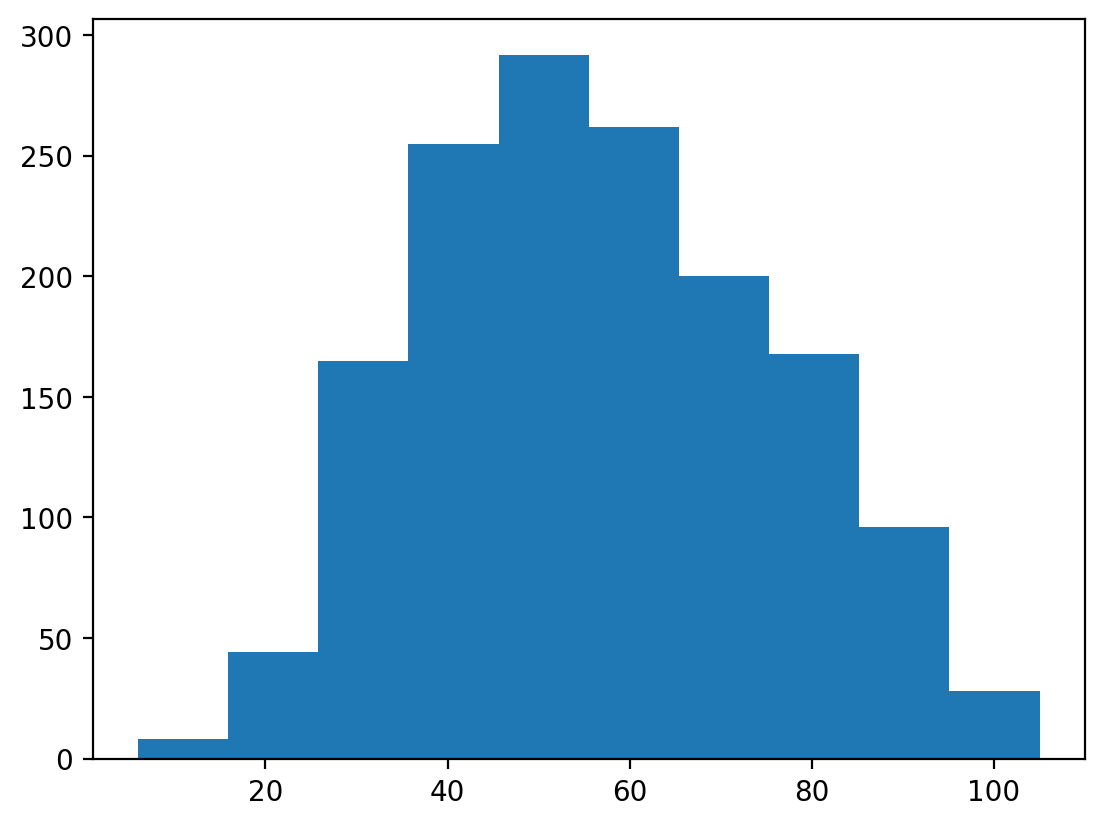

In [33]:
# histogram of all note velocites
# (index 5 is the velocity of the note)
p = plt.hist([n[5] for n in notes])

*Note: MIDI velocity can only be in the range 0-127.*

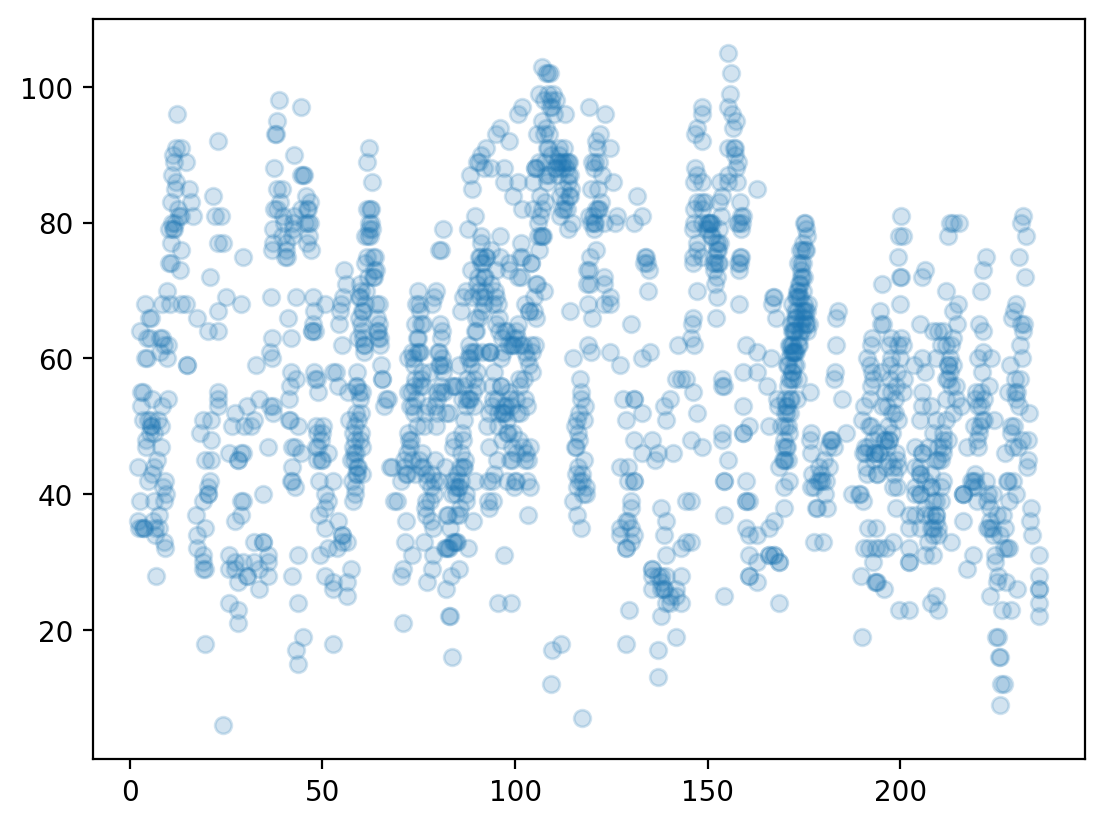

In [38]:
# piece dynamics over time
plt.plot([n[0] for n in notes], [n[5] for n in notes], 'o', alpha=0.2)

### Creating a piano-roll representation

A piano-roll is a matrix where the rows are the notes and the columns are the time steps. 

We can extend it to add the velocity of the note as its value. Color-coding can be used to display the velocity.

That way we would get a nice 3D overview of the performance that shows the velocity of each note at each time step.

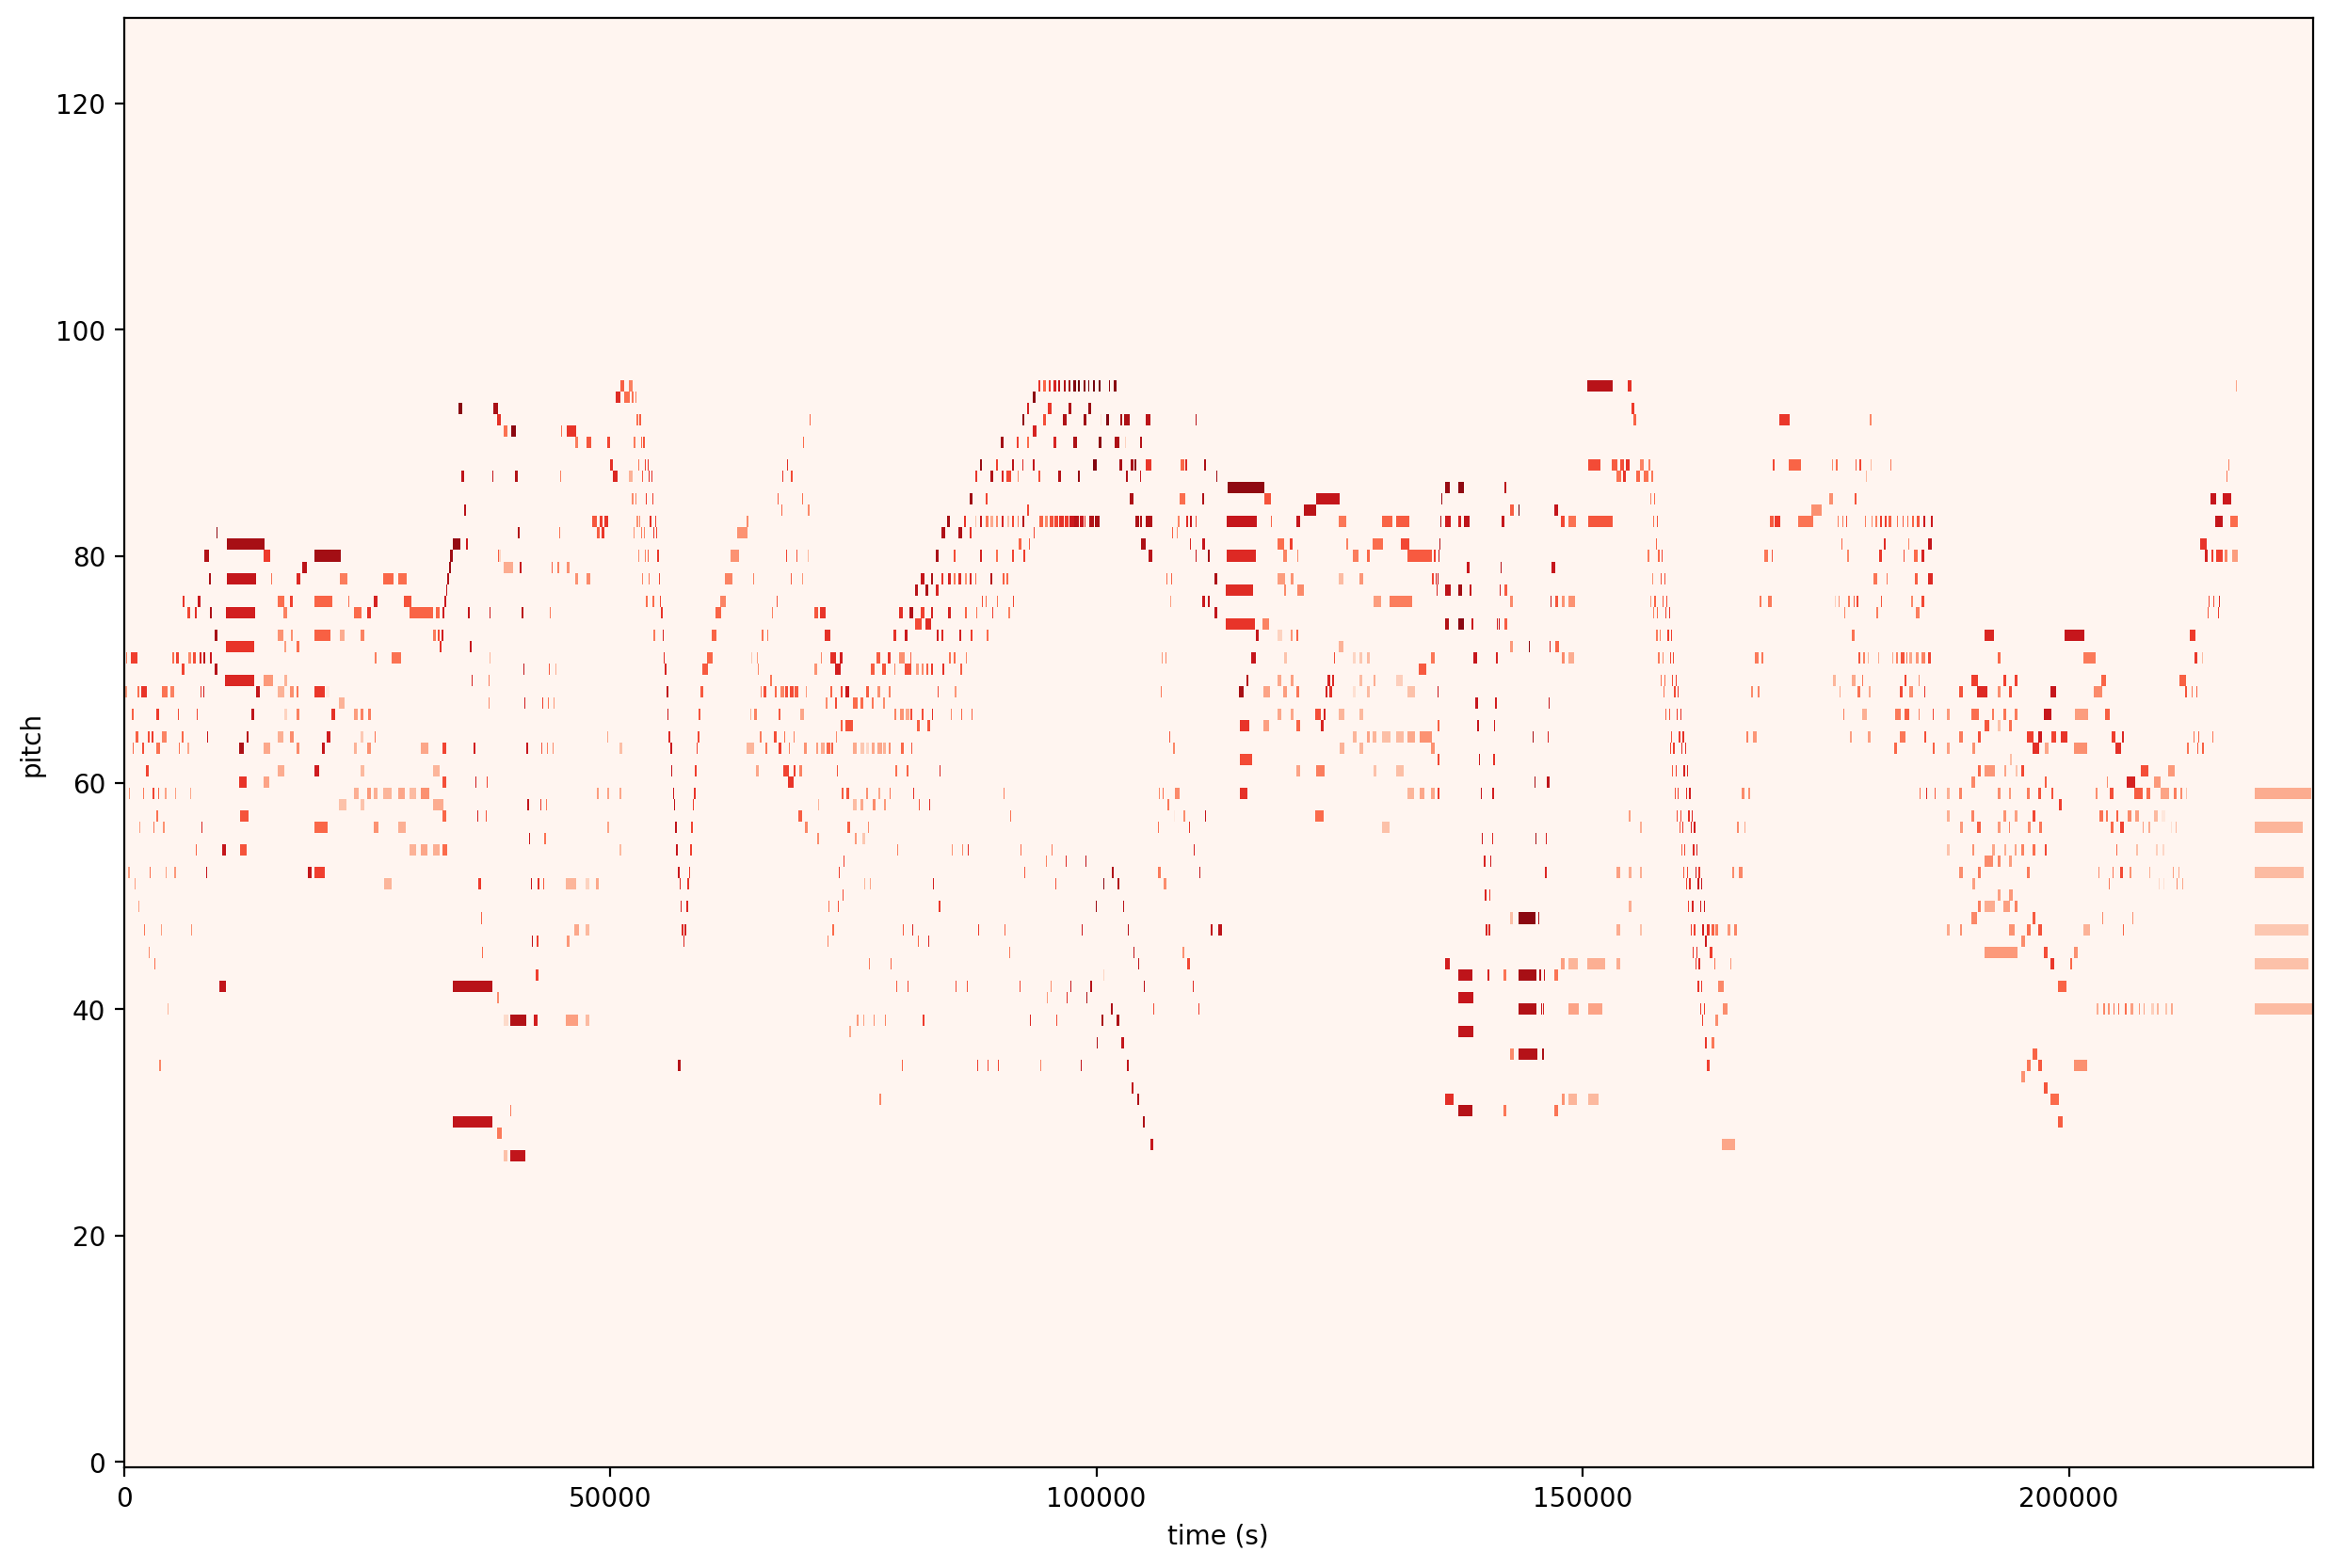

In [68]:
# get the time range of the piece
# note: we will be working with ticks instead of seconds beacause they are integers
start_tick = min(n[2] for n in notes)
end_tick = max(n[2] + n[3] for n in notes)

# init the piano-roll matrix with zeroes
roll = np.zeros((128, int(end_tick - start_tick)))  # shape is (pitches, ticks)

# fill the matrix with the notes
for n in notes:
    pitch_idx = n[4]
    start_idx = int(n[2] - start_tick)
    end_idx = int(n[2] + n[3] - start_tick)
    velocity_normalized = n[5] / 127
    roll[pitch_idx, start_idx:end_idx] = velocity_normalized

# plot the piano-roll
plt.figure(figsize=(15, 10))
plt.imshow(roll, aspect='auto', origin='lower', interpolation='none', cmap='Reds')
plt.xlabel('time (s)')
plt.ylabel('pitch')
plt.show()

### Expanded Groove MIDI dataset

https://magenta.tensorflow.org/datasets/e-gmd

In [ ]:
EGMIDI_BASE_PATH = os.path.join('data', 'eg-midi', 'e-gmd-v1.0.0')
EGMIDI_METADATA_PATH = os.path.join(EGMIDI_BASE_PATH, 'e-gmd-v1.0.0.csv')
egmidi_metadata_df = pd.read_csv(EGMIDI_METADATA_PATH)

In [ ]:
egmidi_metadata_df.sample(10)

drummer            session                     id          style  bpm  \
43837  drummer7  drummer7/session1   drummer7/session1/14           jazz  100   
22339  drummer3  drummer3/session1   drummer3/session1/21           jazz  120   
10356  drummer1  drummer1/session1  drummer1/session1/229  rock/halftime  140   
458    drummer1  drummer1/session1  drummer1/session1/141      funk/fast  125   
33399  drummer7  drummer7/session3  drummer7/session3/101         hiphop   70   
5734   drummer1  drummer1/session1   drummer1/session1/11      jazz/funk  116   
32791  drummer7  drummer7/session2   drummer7/session2/87         hiphop   75   
19083  drummer1  drummer1/session2   drummer1/session2/50           punk  128   
3667   drummer7  drummer7/session2    drummer7/session2/2           rock  120   
9046   drummer1  drummer1/session1  drummer1/session1/195         reggae   78   

      beat_type time_signature    duration       split  \
43837      beat            4-4   59.038526  validation   
22339      beat            4-4    6.992676       train   
10356      fill            4-4    3.428571       train   
458        fill            4-4    1.920000        test   
33399      fill            4-4    3.428571       train   
5734       fill            4-4    2.068957       train   
32791      beat            4-4  144.000000       train   
19083      fill            4-4    1.874989       train   
3667       beat            4-4   10.000000        test   
9046       fill            4-4    3.076916       train   

                                           midi_filename  \
43837     drummer7/session1/14_jazz_100_beat_4-4_31.midi   
22339     drummer3/session1/21_jazz_120_beat_4-4_33.midi   
10356  drummer1/session1/229_rock-halftime_140_fill_4...   
458    drummer1/session1/141_funk-fast_125_fill_4-4_4...   
33399   drummer7/session3/101_hiphop_70_fill_4-4_44.midi   
5734   drummer1/session1/11_jazz-funk_116_fill_4-4_24...   
32791    drummer7/session2/87_hiphop_75_beat_4-4_36.midi   
19083     drummer1/session2/50_punk_128_fill_4-4_52.midi   
3667       drummer7/session2/2_rock_120_beat_4-4_21.midi   
9046    drummer1/session1/195_reggae_78_fill_4-4_25.midi   

                                          audio_filename  \
43837      drummer7/session1/14_jazz_100_beat_4-4_31.wav   
22339      drummer3/session1/21_jazz_120_beat_4-4_33.wav   
10356  drummer1/session1/229_rock-halftime_140_fill_4...   
458    drummer1/session1/141_funk-fast_125_fill_4-4_4...   
33399    drummer7/session3/101_hiphop_70_fill_4-4_44.wav   
5734   drummer1/session1/11_jazz-funk_116_fill_4-4_24...   
32791     drummer7/session2/87_hiphop_75_beat_4-4_36.wav   
19083      drummer1/session2/50_punk_128_fill_4-4_52.wav   
3667        drummer7/session2/2_rock_120_beat_4-4_21.wav   
9046     drummer1/session1/195_reggae_78_fill_4-4_25.wav   

                        kit_name  
43837    More Cowbell (Pop-Rock)  
22339            Shuffle (Blues)  
10356                     Nu RNB  
458    Cassette (Lo-Fi Compress)  
33399         Alternative (Rock)  
5734                 Heavy Metal  
32791          West Coast (FUNK)  
19083                 909 Simple  
3667           Pop-Rock (Studio)  
9046                 Arena Stage

In [ ]:
play_midi(os.path.join(EGMIDI_BASE_PATH, egmidi_metadata_df.iloc[0]['midi_filename'])) # ;/ TODO: how to play midi drums in jupyter notebook?